In [2]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import torch
from torch import nn
import datetime

In [3]:
dataset = pd.read_csv('StockData.csv',index_col="Date",parse_dates = ['Date'])

In [4]:
dataset.isna().any()

Unnamed: 0    False
Open          False
High          False
Low           False
Close         False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9400 entries, 2018-03-27 to 1980-12-12
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9400 non-null   int64  
 1   Open        9400 non-null   float64
 2   High        9400 non-null   float64
 3   Low         9400 non-null   float64
 4   Close       9400 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 440.6 KB


<AxesSubplot:xlabel='Date'>

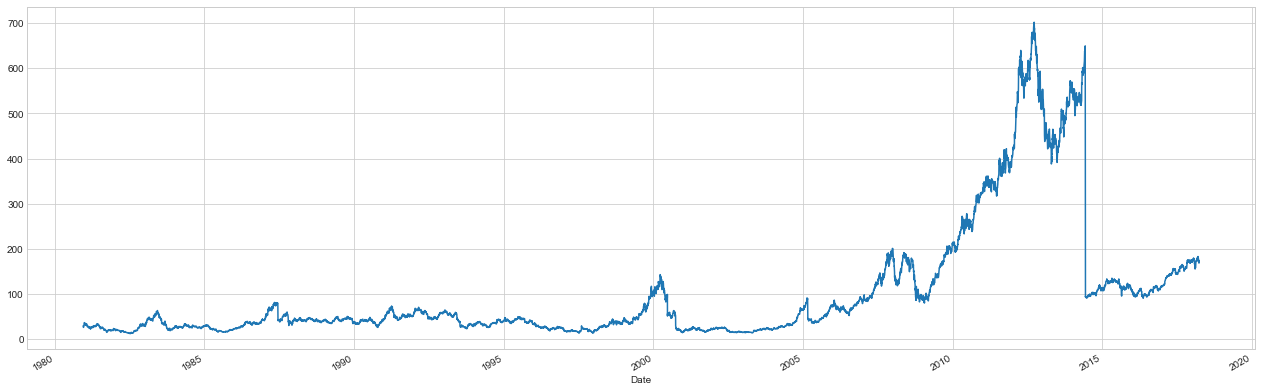

In [6]:
# print(plt.style.available)
style.use('seaborn-whitegrid')
dataset['Open'].plot(figsize=(22,7))

In [7]:
dataset.rolling(7).mean().head(20)

,Unnamed: 0,Open,High,Low,Close
Date,,,,,
2018-03-27,NaN,NaN,NaN,NaN,NaN
2018-03-26,NaN,NaN,NaN,NaN,NaN
2018-03-23,NaN,NaN,NaN,NaN,NaN
2018-03-22,NaN,NaN,NaN,NaN,NaN
2018-03-21,NaN,NaN,NaN,NaN,NaN
2018-03-20,NaN,NaN,NaN,NaN,NaN
2018-03-19,3.0,172.534286,174.315714,169.537143,170.957857
2018-03-16,4.0,173.244286,174.882857,171.065714,172.340714
2018-03-15,5.0,174.734286,175.902857,172.727157,173.180714


In [8]:
dataset.dtypes

Unnamed: 0      int64
Open          float64
High          float64
Low           float64
Close         float64
dtype: object

In [9]:
opens = dataset["Open"]
dataset.shape

(9400, 5)

In [10]:
stock_data = dataset.sort_values(by="Date")
print(stock_data.head())

            Unnamed: 0   Open   High    Low  Close
Date                                              
1980-12-12        9399  28.75  28.87  28.75  28.75
1980-12-15        9398  27.38  27.38  27.25  27.25
1980-12-16        9397  25.37  25.37  25.25  25.25
1980-12-17        9396  25.87  26.00  25.87  25.87
1980-12-18        9395  26.63  26.75  26.63  26.63


In [11]:
from sklearn.preprocessing import MinMaxScaler
price = stock_data[['High','Low','Open','Close']]
print(price[:5])

             High    Low   Open  Close
Date                                  
1980-12-12  28.87  28.75  28.75  28.75
1980-12-15  27.38  27.25  27.38  27.25
1980-12-16  25.37  25.25  25.37  25.25
1980-12-17  26.00  25.87  25.87  25.87
1980-12-18  26.75  26.63  26.63  26.63


In [12]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price = scaler.fit_transform(price.values)
print(price[:5])

[[-0.94884358 -0.94844388 -0.94899391 -0.94863261]
 [-0.95313783 -0.95280073 -0.95295751 -0.95297352]
 [-0.95893076 -0.95860987 -0.95877273 -0.95876139]
 [-0.95711507 -0.95680904 -0.95732616 -0.95696715]
 [-0.95495353 -0.95460157 -0.95512737 -0.95476776]]


In [13]:
train_window = 7 
import numpy as np
def create_inout_sequences(input, tw):
    inout_seq = []
    L = len(input)
    print('Length = ',L)
    for i in range(L-tw):
        data_seq = input[i:i+tw]
        data_label = input[i+tw:i+tw+1][0][3]
        inout_seq.append((data_seq ,data_label))
    
    data = inout_seq
    print('size of data : ', len(data))
    test_set_size = 20
    train_set_size = len(data) - (test_set_size);
    print('size of test : ', test_set_size)
    print('size of train : ', train_set_size)
    
    train = data[:train_set_size]
    test = data[train_set_size:]
  
    return train,test
    

train,test = create_inout_sequences(price, train_window )


Length =  9400
size of data :  9393
size of test :  20
size of train :  9373


In [14]:
print(train[:5])

[(array([[-0.94884358, -0.94844388, -0.94899391, -0.94863261],
       [-0.95313783, -0.95280073, -0.95295751, -0.95297352],
       [-0.95893076, -0.95860987, -0.95877273, -0.95876139],
       [-0.95711507, -0.95680904, -0.95732616, -0.95696715],
       [-0.95495353, -0.95460157, -0.95512737, -0.95476776],
       [-0.95025578, -0.94989616, -0.95044048, -0.95007958],
       [-0.94630737, -0.94588785, -0.94644795, -0.94608595]]), -0.942468528432933), (array([[-0.95313783, -0.95280073, -0.95295751, -0.95297352],
       [-0.95893076, -0.95860987, -0.95877273, -0.95876139],
       [-0.95711507, -0.95680904, -0.95732616, -0.95696715],
       [-0.95495353, -0.95460157, -0.95512737, -0.95476776],
       [-0.95025578, -0.94989616, -0.95044048, -0.95007958],
       [-0.94630737, -0.94588785, -0.94644795, -0.94608595],
       [-0.94270481, -0.94225714, -0.94283152, -0.94246853]]), -0.9377803501664015), (array([[-0.95893076, -0.95860987, -0.95877273, -0.95876139],
       [-0.95711507, -0.95680904, 

In [15]:
class LSTM(nn.Module):
    def __init__(self, input_size=4, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [16]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [17]:
epochs = 5
for i in range(epochs):
    for seq, labels in train:
        seq = torch.from_numpy(np.array(seq)).type(torch.Tensor)
        #print(seq)
        labels = torch.from_numpy(np.array(labels)).type(torch.Tensor)
        #print(labels)
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)
        #print('y_pred : ',y_pred)
        labels = labels.view(1)
        #print('label : ', labels)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   0 loss: 0.0002413343
epoch:   1 loss: 0.0000376585
epoch:   2 loss: 0.0002255793
epoch:   3 loss: 0.0004256658
epoch:   4 loss: 0.0004589978
